In [1]:
%matplotlib widget
import numpy as np
import scipy as sp
import pandas as pd
import scipy.optimize
import pysces
from matplotlib import pyplot as plt
import os
import copy
from lmfit import Model



Matplotlib backend set to: "module://ipympl.backend_nbagg"
Matplotlib interface loaded (pysces.plt.m)
Pitcon routines available
NLEQ2 routines available
SBML support available
You are using NumPy (1.26.4) with SciPy (1.12.0)
Assimulo CVode available
RateChar is available
Parallel scanner is available

PySCeS environment
******************
pysces.model_dir = /Users/cameronbunch/Pysces/psc
pysces.output_dir = /Users/cameronbunch/Pysces


***********************************************************************
* Welcome to PySCeS (1.2.0) - Python Simulator for Cellular Systems   *
*                http://pysces.sourceforge.net                        *
* Copyright(C) B.G. Olivier, J.M. Rohwer, J.-H.S. Hofmeyr, 2004-2024  *
* Triple-J Group for Molecular Cell Physiology                        *
* Stellenbosch University, ZA and VU University Amsterdam, NL         *
* PySCeS is distributed under the PySCeS (BSD style) licence, see     *
* LICENCE.txt (supplied with this release) for details  

In [9]:
a0b0 = pd.read_csv('A0B0.csv', sep=',', names=['Time', 'NADPH'])
a5b24 = pd.read_csv('A0.5B24.csv', sep=',', names=['Time', 'NADPH'])
a1b24 = pd.read_csv('A1B24.csv', sep=',', names=['Time', 'NADPH'])
a2b24 = pd.read_csv('A2B24.csv', sep=',', names=['Time', 'NADPH'])
a4b24 = pd.read_csv('A4B24.csv', sep=',', names=['Time', 'NADPH'])
a8b24 = pd.read_csv('A8B24.csv', sep=',', names=['Time', 'NADPH'])

In [10]:
a5b24

Time     NADPH
0   0.00 -0.001491
1   0.01  0.004885
2   0.02  0.006370
3   0.03  0.005808
4   0.04  0.011442
5   0.05  0.011519
6   0.06  0.010109
7   0.07  0.013746
8   0.08  0.022254
9   0.09  0.023450
10  0.10  0.024279

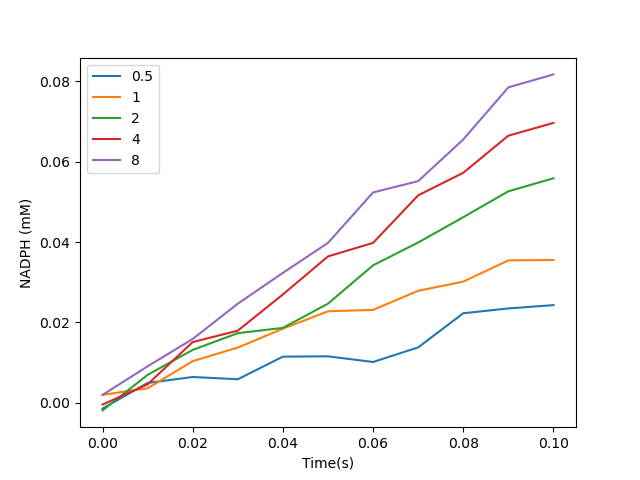

In [12]:
f, ax = plt.subplots()
ax.plot(a5b24.Time, a5b24.NADPH, label='0.5' )
ax.plot(a1b24.Time, a1b24.NADPH, label='1' )
ax.plot(a2b24.Time, a2b24.NADPH, label='2' )
ax.plot(a4b24.Time, a4b24.NADPH, label='4' )
ax.plot(a8b24.Time, a8b24.NADPH, label='8' )
ax.set_xlabel('Time(s)')
ax.set_ylabel('NADPH (mM)')
ax.legend()

In [13]:

a8b15 = pd.read_csv('A8B1.5.csv', sep=',', names=['Time', 'NADPH'])
a8b12 = pd.read_csv('A8B12.csv', sep=',', names=['Time', 'NADPH'])
a8b3 = pd.read_csv('A8B3.csv', sep=',', names=['Time', 'NADPH'])
a8b6 = pd.read_csv('A8B6.csv', sep=',', names=['Time', 'NADPH'])

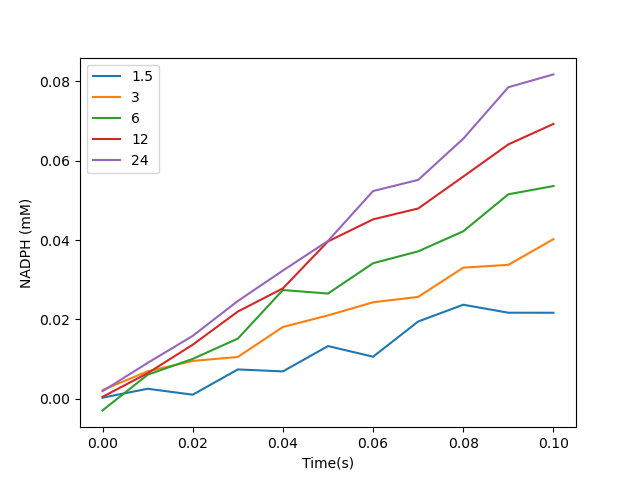

In [14]:
f, ax = plt.subplots()
ax.plot(a8b15.Time, a8b15.NADPH, label='1.5' )
ax.plot(a8b3.Time, a8b3.NADPH, label='3' )
ax.plot(a8b6.Time, a8b6.NADPH, label='6' )
ax.plot(a8b12.Time, a8b12.NADPH, label='12' )
ax.plot(a8b24.Time, a8b24.NADPH, label='24' )
ax.set_xlabel('Time(s)')
ax.set_ylabel('NADPH (mM)')
ax.legend()

In [15]:
reg00 = sp.stats.linregress(a0b0)
reg524 = sp.stats.linregress(a5b24)
reg124 = sp.stats.linregress(a1b24)
reg224 = sp.stats.linregress(a2b24)
reg424 = sp.stats.linregress(a4b24)
reg824 = sp.stats.linregress(a8b24)
reg815 = sp.stats.linregress(a8b15)
reg83 = sp.stats.linregress(a8b3)
reg86 = sp.stats.linregress(a8b6)
reg812 = sp.stats.linregress(a8b12)

In [16]:
reg00

LinregressResult(slope=0.004954646341627728, intercept=-0.0003844486520904228, rvalue=0.04875889672077167, pvalue=0.8867933841613469, stderr=0.03383145440982157, intercept_stderr=0.0020014958346680173)

In [20]:
regs = [reg00, reg524, reg124, reg224, reg424, reg824, reg815, reg83, reg86, reg812]

In [64]:

rates = []
for reg in regs:
    print(reg.slope)
    rates.append(reg.slope)
rates = np.array(rates)

0.004954646341627728
0.24118661159479945
0.3526304449083254
0.574650069610554
0.7322856639928835
0.8250788434733142
0.25422083243133853
0.3679535702854621
0.556408829374724
0.701203980466376


In [65]:
rates = pd.DataFrame(rates, columns=['rates'])

In [66]:
rates

rates
0  0.004955
1  0.241187
2  0.352630
3  0.574650
4  0.732286
5  0.825079
6  0.254221
7  0.367954
8  0.556409
9  0.701204

In [67]:
rates['a']=0
rates['b']=0

In [68]:
rates

rates  a  b
0  0.004955  0  0
1  0.241187  0  0
2  0.352630  0  0
3  0.574650  0  0
4  0.732286  0  0
5  0.825079  0  0
6  0.254221  0  0
7  0.367954  0  0
8  0.556409  0  0
9  0.701204  0  0

In [69]:
concsa = []
concsa = np.array([0,0.5,1,2,4,8,8,8,8,8])
concsa = pd.DataFrame(concsa, columns=['a'])
concsb = []
concsb = np.array([0,24,24,24,24,24,1.5,3,6,12])
concsb = pd.DataFrame(concsb, columns=['b'])
concsa['b'] = 0
concsb['a'] = 0

In [70]:
concsa

a  b
0  0.0  0
1  0.5  0
2  1.0  0
3  2.0  0
4  4.0  0
5  8.0  0
6  8.0  0
7  8.0  0
8  8.0  0
9  8.0  0

In [71]:
concsb

b  a
0   0.0  0
1  24.0  0
2  24.0  0
3  24.0  0
4  24.0  0
5  24.0  0
6   1.5  0
7   3.0  0
8   6.0  0
9  12.0  0

In [72]:
concs = concsa+concsb

In [73]:
concs

a     b
0  0.0   0.0
1  0.5  24.0
2  1.0  24.0
3  2.0  24.0
4  4.0  24.0
5  8.0  24.0
6  8.0   1.5
7  8.0   3.0
8  8.0   6.0
9  8.0  12.0

In [74]:
concs['rates'] = 0

In [75]:
c_and_r = concs+rates

In [76]:
c_and_r

a     b     rates
0  0.0   0.0  0.004955
1  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0  24.0  0.825079
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204

In [77]:
def v(Vf, a, b, Ka, Kb):
    return (Vf*a*b)/((Ka+a)*(Kb+b))

In [80]:
from lmfit import Model
mymod = Model(v, independent_vars=['a','b'])
mypar = mymod.make_params(Vf=1,Ka=1,Kb=1)
myfit = mymod.fit(c_and_r.rates, mypar, a=c_and_r.a, b=c_and_r.b)
myfit
#Vf has units of mM/min and both Ka and Kb are unitless 

In [135]:
myfit.eval?

Signature: myfit.eval(params=None, **kwargs)
Docstring:
Evaluate model function.

Parameters
----------
params : Parameters, optional
    Parameters to use.
**kwargs : optional
    Options to send to Model.eval().

Returns
-------
numpy.ndarray, float, int, or complex
    Array or value for the evaluated model.
File:      /opt/miniconda3/envs/minicourse/lib/python3.11/site-packages/lmfit/model.py
Type:      method

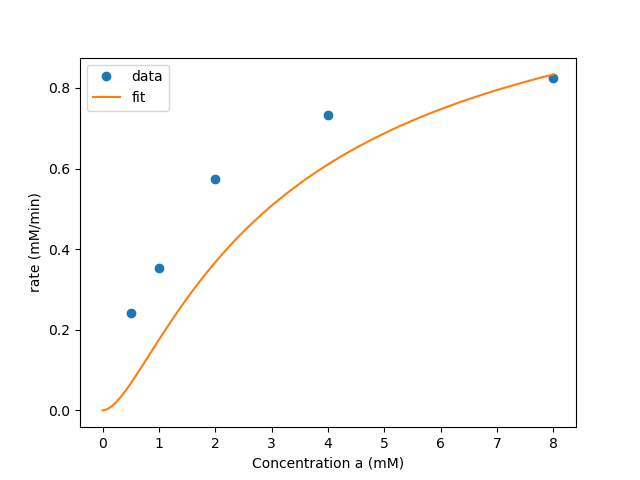

In [156]:
svalsb = np.linspace(0,24,100)
svalsa = np.linspace(0,8,100)

fig, ax = plt.subplots()
ax.plot(c_and_r.a[1:6], c_and_r.rates[1:6], 'o', label='data') 
ax.plot(svalsa, myfit.eval(a=svalsa, b=svalsb), label='fit') 
ax.set_xlabel('Concentration a (mM)')
ax.set_ylabel('rate (mM/min)')
ax.legend()

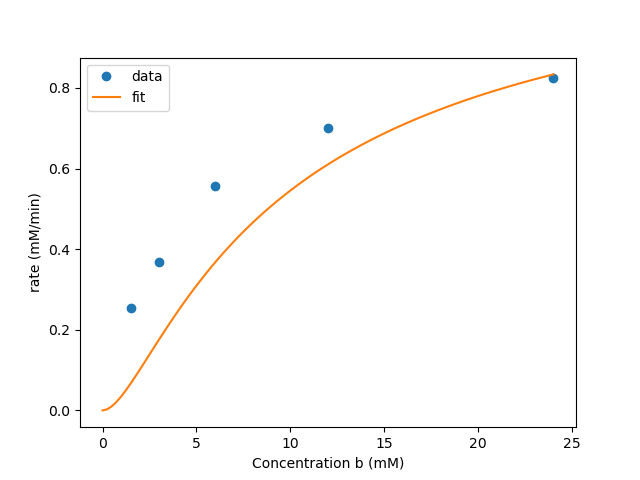

In [153]:
svalsb = np.linspace(0,24,100)
svalsa = np.linspace(0,8,100)
fig, ax = plt.subplots()
ax.plot(c_and_r.b[5:10], c_and_r.rates[5:10], 'o', label='data') 
ax.plot(svalsb, myfit.eval(a=svalsa, b=svalsb), label='fit') 
ax.set_xlabel('Concentration b (mM)')
ax.set_ylabel('rate (mM/min)')
ax.legend()

In [157]:
np.linspace?

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x111f05e40>
File:            /opt/miniconda3/envs/minicourse/lib/python3.11/site-packages/numpy/core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
  